<a href="https://colab.research.google.com/github/GodishalaAshwith/MachineLearningLab/blob/main/MLAssignment1_179.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Regression

## a)

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target


## b)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## (c) Objective of Logistic Regression with L2 Regularization

Logistic regression is a method that predicts the probability of an instance belonging to a certain class. Instead of giving a hard “yes/no” answer, it learns a set of weights that shape a probability curve.

For each input $x_i$, the model outputs:

$$
p(y_i = 1 \mid x_i; w, b) = \frac{1}{1 + e^{-(w^\top x_i + b)}}
$$

* $w$: weight vector we want to learn
* $b$: bias term
* $\sigma(z) = \frac{1}{1 + e^{-z}}$: sigmoid function mapping scores into probabilities

---

### Cross-Entropy Loss

To measure how well the model’s predictions match the actual labels, we use the **cross-entropy loss** (also called negative log-likelihood):

$$
\text{Loss}(w, b) = -\frac{1}{n} \sum_{i=1}^{n} \Big[ y_i \log(\hat{p}_i) + (1 - y_i)\log(1 - \hat{p}_i) \Big]
$$

where $\hat{p}_i = \sigma(w^\top x_i + b)$.

* The loss is small if the model assigns high probability to the correct class.
* The loss is large if the model is confident but wrong.

---

### Adding L2 Regularization

To avoid **overfitting** (where the model memorizes training data and fails on new data), we add a penalty that discourages very large weights. This is the **L2 penalty**:

$$
J(w, b) = \text{Loss}(w, b) + \frac{\lambda}{2n} \|w\|_2^2
$$

* $\|w\|_2^2 = \sum_j w_j^2$: squared magnitude of the weights
* $\lambda$: controls how strong the penalty is

  * $\lambda = 0$: no penalty → risk of overfitting
  * Large $\lambda$: weights shrink toward zero → reduces variance but may underfit

---

**In plain words:**
Logistic regression learns weights that help separate the classes. The cross-entropy ensures predictions fit the training data, while L2 regularization keeps the weights under control so the model generalizes better.



## d)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

lambdas = [0, 0.1, 1, 10, 100, 1000]

train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []
weight_norms, weights_all = [], []

for lam in lambdas:
    if lam == 0:
        # λ = 0 means no regularization
        model = LogisticRegression(
            penalty=None,     # <-- FIXED
            solver='lbfgs',
            max_iter=5000
        )
    else:
        # L2 penalty with strength λ
        # In sklearn: regularization strength = 1/λ
        model = LogisticRegression(
            penalty='l2',
            C=1/lam,
            solver='lbfgs',
            max_iter=5000
        )


    # Train the model on training data
    model.fit(X_train, y_train)

    # Predicted probabilities for loss calculation
    y_train_prob = model.predict_proba(X_train)
    y_test_prob = model.predict_proba(X_test)

    # Cross-entropy (log loss) for train/test sets
    train_losses.append(log_loss(y_train, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))

    # Accuracy for train/test sets
    train_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, model.predict(X_test)))

    # Save L2 norm of weight vector (ignoring bias term)
    weight_norms.append(np.linalg.norm(model.coef_))

    # Save all weights for plotting later
    weights_all.append(model.coef_.flatten())

weights_all = np.array(weights_all)




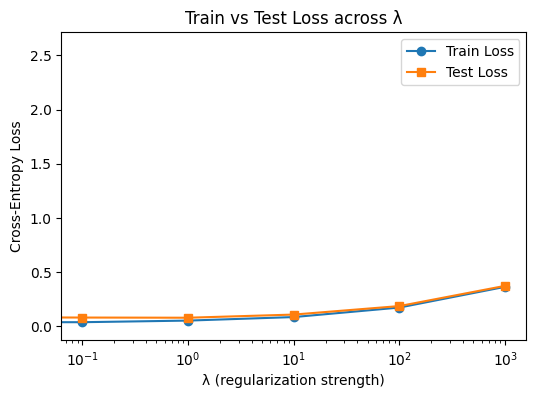

In [ ]:
# Plot 1: Cross-entropy vs λ
plt.figure(figsize=(6,4))
plt.plot(lambdas, train_losses, marker='o', label="Train Loss")
plt.plot(lambdas, test_losses, marker='s', label="Test Loss")
plt.xscale("log")  # log scale for λ
plt.xlabel("λ (regularization strength)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Train vs Test Loss across λ")
plt.legend()
plt.show()

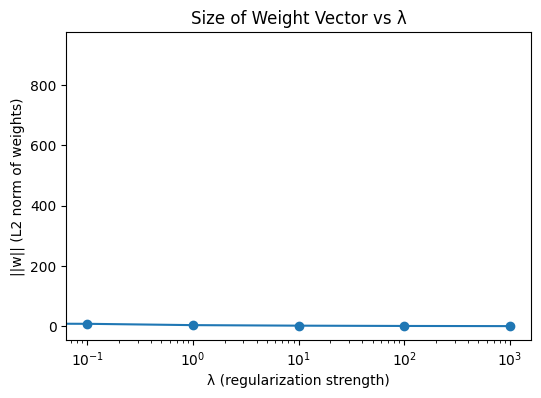

In [ ]:
# Plot 2: Weight vector norm vs λ
plt.figure(figsize=(6,4))
plt.plot(lambdas, weight_norms, marker='o')
plt.xscale("log")
plt.xlabel("λ (regularization strength)")
plt.ylabel("||w|| (L2 norm of weights)")
plt.title("Size of Weight Vector vs λ")
plt.show()

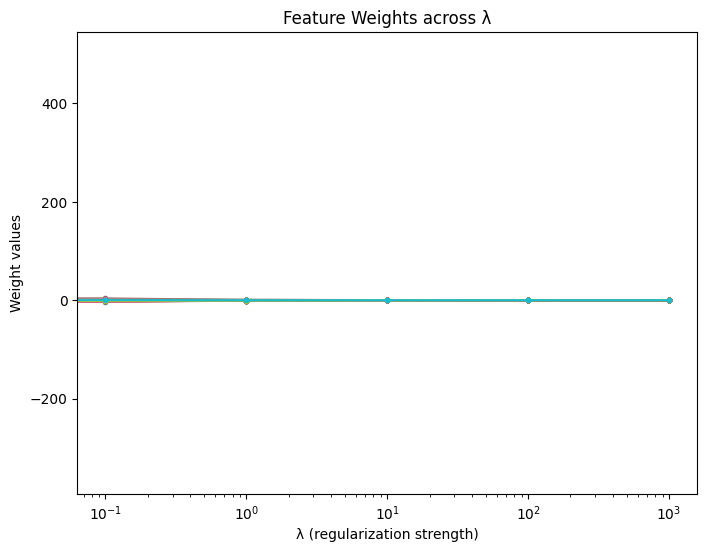

In [ ]:
# Plot 3: Actual weights vs λ (one curve per feature)
plt.figure(figsize=(8,6))
for j in range(weights_all.shape[1]):
    plt.plot(lambdas, weights_all[:, j], marker='.')
plt.xscale("log")
plt.xlabel("λ (regularization strength)")
plt.ylabel("Weight values")
plt.title("Feature Weights across λ")
plt.show()

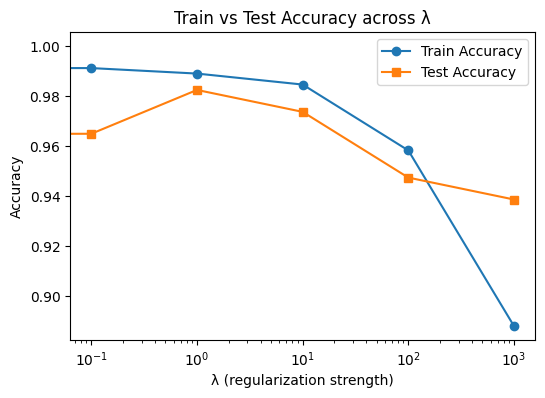

In [ ]:
# Plot 4: Accuracy vs λ
plt.figure(figsize=(6,4))
plt.plot(lambdas, train_accuracies, marker='o', label="Train Accuracy")
plt.plot(lambdas, test_accuracies, marker='s', label="Test Accuracy")
plt.xscale("log")
plt.xlabel("λ (regularization strength)")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy across λ")
plt.legend()
plt.show()

## e)

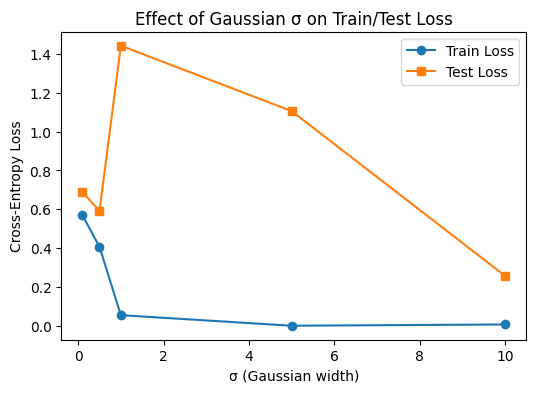

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

def gaussian_basis_transform(X, sigma, n_centers=5, min_val=-10, max_val=10):
    """
    Expand input data X using Gaussian basis functions.

    Parameters:
    - X: input data, shape (n_samples, n_features)
    - sigma: width of Gaussian basis
    - n_centers: how many basis functions per feature
    - min_val, max_val: range for placing centers

    Returns:
    - Transformed data of shape (n_samples, n_features * n_centers)
    """
    n_samples, n_features = X.shape
    centers = np.linspace(min_val, max_val, n_centers)

    # Expand each feature with its Gaussian basis functions
    transformed = []
    for j in range(n_features):
        for mu in centers:
            phi = np.exp(-0.5 * ((X[:, j] - mu) / sigma) ** 2)
            transformed.append(phi)

    # Stack into matrix form
    return np.column_stack(transformed)


sigmas = [0.1, 0.5, 1, 5, 10]

train_losses_sigma = []
test_losses_sigma = []

for sigma in sigmas:
    # Transform data with Gaussian basis functions
    X_train_phi = gaussian_basis_transform(X_train, sigma)
    X_test_phi = gaussian_basis_transform(X_test, sigma)

    # Train logistic regression without regularization
    model = LogisticRegression(
        penalty=None,  # no regularization
        solver='lbfgs',
        max_iter=5000
    )
    model.fit(X_train_phi, y_train)

    # Evaluate cross-entropy loss
    train_loss = log_loss(y_train, model.predict_proba(X_train_phi))
    test_loss = log_loss(y_test, model.predict_proba(X_test_phi))

    train_losses_sigma.append(train_loss)
    test_losses_sigma.append(test_loss)

# Plot training vs testing error across sigma values
plt.figure(figsize=(6,4))
plt.plot(sigmas, train_losses_sigma, marker='o', label="Train Loss")
plt.plot(sigmas, test_losses_sigma, marker='s', label="Test Loss")
plt.xlabel("σ (Gaussian width)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Effect of Gaussian σ on Train/Test Loss")
plt.legend()
plt.show()


## f)

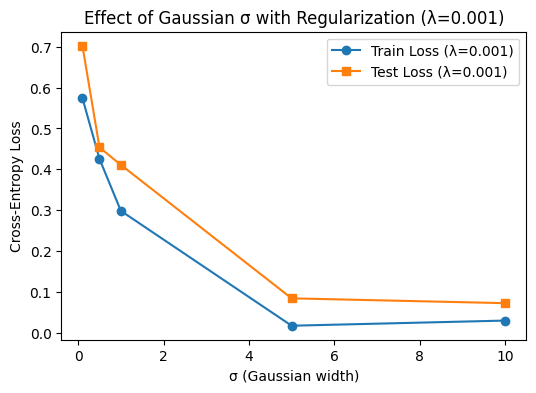

In [ ]:
# Gaussian basis experiment with L2 regularization (λ = 0.001)

sigmas = [0.1, 0.5, 1, 5, 10]

train_losses_reg = []
test_losses_reg = []

for sigma in sigmas:
    # Transform with Gaussian basis
    X_train_phi = gaussian_basis_transform(X_train, sigma)
    X_test_phi = gaussian_basis_transform(X_test, sigma)

    # Train logistic regression with L2 penalty
    model = LogisticRegression(
        penalty="l2",
        C=1000,           # C = 1 / λ
        solver="lbfgs",
        max_iter=5000
    )
    model.fit(X_train_phi, y_train)

    # Compute cross-entropy loss
    train_loss = log_loss(y_train, model.predict_proba(X_train_phi))
    test_loss = log_loss(y_test, model.predict_proba(X_test_phi))

    train_losses_reg.append(train_loss)
    test_losses_reg.append(test_loss)

# Plot training vs test loss across sigma values
plt.figure(figsize=(6,4))
plt.plot(sigmas, train_losses_reg, marker='o', label="Train Loss (λ=0.001)")
plt.plot(sigmas, test_losses_reg, marker='s', label="Test Loss (λ=0.001)")
plt.xlabel("σ (Gaussian width)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Effect of Gaussian σ with Regularization (λ=0.001)")
plt.legend()
plt.show()


## g)

In [ ]:
# Define lambda values (regularization strength)
lambdas = [0, 0.1, 1, 10, 100, 1000, 10000]

train_losses = []
test_losses = []
weight_norms = []
weight_norms_by_sigma = {sigma: [] for sigma in [0.1, 0.5, 1, 5, 10]}

# Create transformed data with all sigmas combined
def combined_gaussian_transform(X):
    return np.hstack([gaussian_basis_transform(X, sigma) for sigma in [0.1, 0.5, 1, 5, 10]])

X_train_all = combined_gaussian_transform(X_train)
X_test_all = combined_gaussian_transform(X_test)

for lam in lambdas:
    # Convert λ to sklearn's C
    if lam == 0:
        C_val = 1e12   # practically no regularization
    else:
        C_val = 1 / lam

    # Train logistic regression
    model = LogisticRegression(
        penalty="l2",
        C=C_val,
        solver="lbfgs",
        max_iter=5000
    )
    model.fit(X_train_all, y_train)

    # Compute cross-entropy loss
    train_loss = log_loss(y_train, model.predict_proba(X_train_all))
    test_loss = log_loss(y_test, model.predict_proba(X_test_all))

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    # Compute full weight norm
    weights = model.coef_.flatten()
    weight_norms.append(np.linalg.norm(weights))

    # Split weights by sigma groups (since we stacked them)
    start = 0
    for sigma in [0.1, 0.5, 1, 5, 10]:
        end = start + gaussian_basis_transform(X_train, sigma).shape[1]
        weight_norms_by_sigma[sigma].append(np.linalg.norm(weights[start:end]))
        start = end

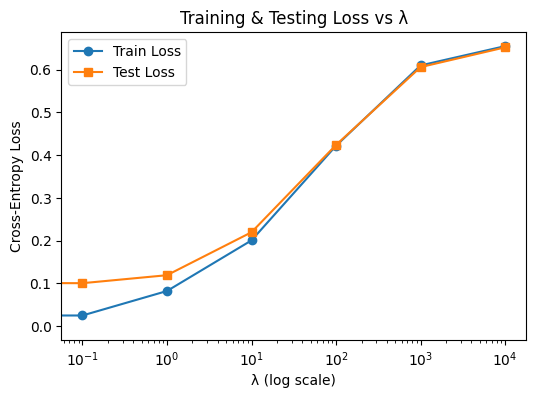

In [ ]:
# ------------------- Plot 1: Loss vs λ -------------------
plt.figure(figsize=(6,4))
plt.plot(lambdas, train_losses, marker='o', label="Train Loss")
plt.plot(lambdas, test_losses, marker='s', label="Test Loss")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Training & Testing Loss vs λ")
plt.legend()
plt.show()

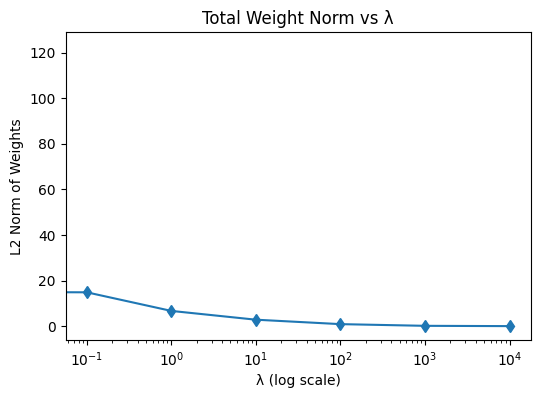

In [ ]:
# ------------------- Plot 2: Total Weight Norm vs λ -------------------
plt.figure(figsize=(6,4))
plt.plot(lambdas, weight_norms, marker='d')
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("L2 Norm of Weights")
plt.title("Total Weight Norm vs λ")
plt.show()

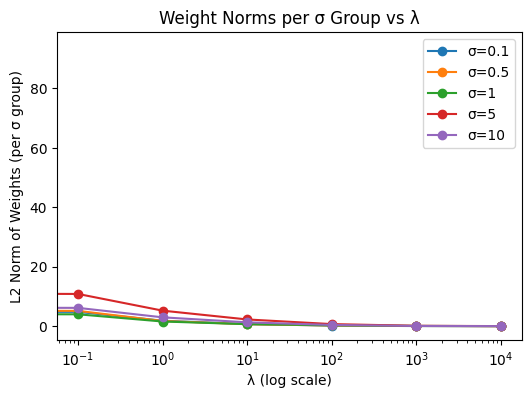

In [ ]:
# ------------------- Plot 3: Weight Norms by σ vs λ -------------------
plt.figure(figsize=(6,4))
for sigma in weight_norms_by_sigma:
    plt.plot(lambdas, weight_norms_by_sigma[sigma], marker='o', label=f"σ={sigma}")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("L2 Norm of Weights (per σ group)")
plt.title("Weight Norms per σ Group vs λ")
plt.legend()
plt.show()


## (h) Designing Gaussian Basis Functions for Input Relationships

So far, we only applied Gaussian basis functions **individually to each input variable**. This ignores how features might interact with each other (e.g., how *mean radius* and *mean texture* together influence cancer detection in the breast cancer dataset).

---

### 🔹 How to capture relationships between inputs

To include interactions, we could:

1. **Multivariate Gaussian basis functions**

   * Instead of using 1D Gaussians on each feature, define Gaussians in the full input space:

     $$
     \phi_j(\mathbf{x}) = \exp\left(-\frac{||\mathbf{x} - \mu_j||^2}{2\sigma^2}\right)
     $$

     where each basis has a **center vector** μj (one per feature dimension).
   * This lets us capture correlations across features.

2. **Pairwise Gaussian combinations**

   * For each pair of variables $(x_i, x_j)$, add Gaussian functions like:

     $$
     \exp\left(-\frac{(x_i - \mu_i)^2 + (x_j - \mu_j)^2}{2\sigma^2}\right)
     $$
   * These capture **second-order interactions**.

3. **Higher-order basis functions**

   * Extend to triples or more variables, but complexity grows **exponentially**.

---

### 🔹 Impact on Bias-Variance Trade-off

* **Bias decreases:**

  * By modeling interactions, the model is more expressive and can fit complex decision boundaries.

* **Variance increases:**

  * Adding many interaction terms means many more parameters → model becomes prone to overfitting unless we add **stronger regularization** or have **lots of data**.

* **Trade-off:**

  * Too few basis functions → underfitting (high bias).
  * Too many interaction basis functions → overfitting (high variance).
  * Regularization (L2 penalty) helps control this by shrinking unnecessary interaction weights.



## (i) Adaptive Gaussian Basis Function Learning

Instead of placing Gaussian basis functions at fixed, evenly spaced locations, we can **learn both the centers $\mu_i$ and the logistic regression weights $w$ from the data**. This allows the model to adapt the features to better capture the underlying patterns.

---

### 1. Model Formulation

For a single feature $x$, the adaptive Gaussian basis function model is:

$$
p(y = 1 \mid x; w, \mu) = \sigma\Bigg(\sum_{i=1}^{M} w_i \exp\Big(-\frac{(x - \mu_i)^2}{2\sigma^2}\Big)\Bigg)
$$

Where:

* $w_i$ = weight of the i-th Gaussian
* $\mu_i$ = center of the i-th Gaussian (learned from data)
* $\sigma$ = fixed width of Gaussians
* $\sigma(z) = \frac{1}{1 + e^{-z}}$ = sigmoid function

The objective with L2 regularization on weights is:

$$
J(w, \mu) = -\frac{1}{n}\sum_{j=1}^{n} \Big[y_j \log \hat{p}_j + (1-y_j) \log (1-\hat{p}_j)\Big] + \frac{\lambda}{2} \|w\|^2
$$

---

### 2. Learning Algorithm

Because the model is **non-linear in $\mu$**, we cannot solve for $\mu$ directly. Instead, we use an **iterative, alternating optimization approach**:

1. **Initialize**

   * Choose initial centers $\mu_i$ (e.g., evenly spaced)
   * Initialize weights $w = 0$

2. **Repeat until convergence**:
   a. **Fix $\mu$, update $w$**

   * Transform inputs using current Gaussian basis functions
   * Train logistic regression with L2 regularization on transformed features
     b. **Fix $w$, update $\mu$**
   * Use gradient descent to minimize the cross-entropy with respect to each $\mu_i$:

     $$
     \mu_i \gets \mu_i - \eta \frac{\partial J}{\partial \mu_i}
     $$
   * Gradient of loss w\.r.t $\mu_i$ for a single feature:

     $$
     \frac{\partial J}{\partial \mu_i} = \frac{1}{n}\sum_{j=1}^{n} (\hat{p}_j - y_j) w_i \frac{x_j - \mu_i}{\sigma^2} \exp\Big(-\frac{(x_j - \mu_i)^2}{2\sigma^2}\Big)
     $$

3. **Stop** when the change in loss is very small or after a maximum number of iterations.

---

### 3. Pseudocode

```text
Input: X_train, y_train, initial μ_i, learning rate η, λ, σ
Initialize w_i = 0

repeat until convergence:
    # Step 1: Fix μ, optimize w
    Transform X_train using φ(x; μ_i, σ)
    Train logistic regression with L2 regularization to update w
    
    # Step 2: Fix w, optimize μ
    for each μ_i:
        μ_i = μ_i - η * gradient_J_wrt_μ_i
```

---

### 4. Notes

* This is an **iterative algorithm** because μ updates are non-convex; there’s no closed-form solution.
* Each iteration decreases the objective, but due to **non-convexity**, the algorithm may converge to a **local minimum**, not a global minimum.
* Regularization (L2) is applied **only to w**, not μ.
* Learning rate η must be chosen carefully to balance stability and convergence speed.

---

### 5. Summary

* We jointly learn weights $w$ and centers $\mu$ using an alternating approach: logistic regression updates for $w$ and gradient descent updates for $\mu$.
* This allows the Gaussian basis functions to **adapt to the data**, potentially capturing more complex patterns.
* Convergence is **to a local optimum**, and the solution depends on the initialization of μ.


## (j) Convergence of the Adaptive Gaussian Basis Algorithm

When we learn both the Gaussian centers $\mu_i$ and the weight vector $w$ iteratively, it is important to understand **whether the algorithm converges** and the **nature of the solution** it finds.

---

### 1. Convergence Behavior

* The algorithm alternates between:

  1. **Updating $w$** (weights) using standard logistic regression → convex optimization.
  2. **Updating $\mu$** (centers) using gradient descent → non-convex optimization.

* **Properties:**

  * Updating $w$ for fixed $\mu$ **always decreases the objective** and converges to the global minimum for that fixed μ.
  * Updating μ for fixed w using gradient descent **typically decreases the objective**, but since the problem is non-convex in μ, it may converge to **a local minimum** rather than the global minimum.

* **Overall convergence:**

  * The alternating optimization procedure is **guaranteed to converge to a stationary point** of the objective function, because each step does not increase the loss.
  * However, this stationary point is **not necessarily globally optimal**, due to the non-convexity in μ.

---

### 2. Factors Affecting Convergence

* **Initialization of μ:**

  * Different initial positions of the Gaussian centers may lead to **different local minima**.
  * Good initialization (e.g., evenly spaced or using clustering centers) can improve the quality of the solution.

* **Learning rate (η) for μ updates:**

  * Too large → instability, may oscillate or diverge.
  * Too small → very slow convergence.

* **Regularization (λ):**

  * Only affects w, not μ.
  * Helps prevent overfitting and stabilizes the optimization of weights.

---

### 3. Nature of the Solution

* The algorithm finds a **locally optimal solution**:

  * Optimal $w$ for the current μ (global optimum in w).
  * μ that is a local minimum of the loss given w.

* **Global optimum is not guaranteed** because the objective is **non-convex in μ**.

---

### 4. Summary

* The adaptive Gaussian basis algorithm **converges to a stationary point**, which is typically a **local minimum**.
* The quality of the solution depends on **initialization, learning rate, and regularization**.
* Careful tuning and multiple runs with different initial μ can improve the chance of reaching a better local optimum.

# 2.

## Linear Regression

=== Linear Regression Experiments ===
Single Feature R2: 0.45885918903846656
Multi Linear R2: 0.575787706032451
Polynomial (degree=2) R2: 0.46331772769346224
Ridge R2: 0.5758157428913684
Lasso R2: 0.5768562568705682

=== Logistic Regression Experiments ===
Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



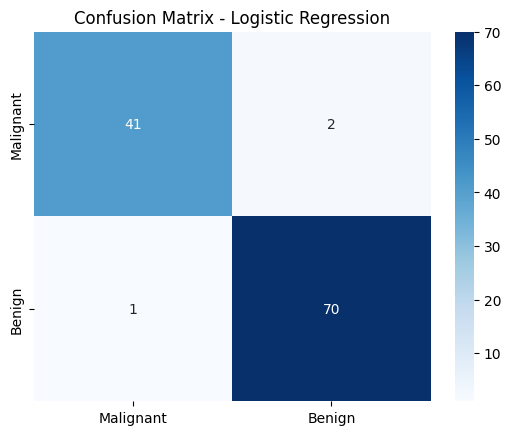

In [ ]:
# ========================
# 1. Import libraries
# ========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# ========================
# 2. California Housing - Regression
# ========================
housing = fetch_california_housing(as_frame=True)
X, y = housing.data, housing.target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("=== Linear Regression Experiments ===")

# --- (a) Single Feature Linear Regression (MedInc vs Target) ---
X_medinc = X_train_scaled[:, [0]]  # only Median Income
X_medinc_test = X_test_scaled[:, [0]]

lin_single = LinearRegression()
lin_single.fit(X_medinc, y_train)
y_pred_single = lin_single.predict(X_medinc_test)

print("Single Feature R2:", r2_score(y_test, y_pred_single))

# --- (b) Multiple Linear Regression ---
lin_multi = LinearRegression()
lin_multi.fit(X_train_scaled, y_train)
y_pred_multi = lin_multi.predict(X_test_scaled)

print("Multi Linear R2:", r2_score(y_test, y_pred_multi))

# --- (c) Polynomial Regression (degree=2 on MedInc feature) ---
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_medinc)
X_poly_test = poly.transform(X_medinc_test)

lin_poly = LinearRegression()
lin_poly.fit(X_poly, y_train)
y_pred_poly = lin_poly.predict(X_poly_test)

print("Polynomial (degree=2) R2:", r2_score(y_test, y_pred_poly))

# --- (d) Ridge Regression ---
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
print("Ridge R2:", r2_score(y_test, ridge_pred))

# --- (e) Lasso Regression ---
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)
print("Lasso R2:", r2_score(y_test, lasso_pred))

# ========================
# 3. Breast Cancer - Classification
# ========================
cancer = load_breast_cancer(as_frame=True)
X_c, y_c = cancer.data, cancer.target

# Train-Test Split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)

# Scaling
scaler_c = StandardScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled = scaler_c.transform(X_test_c)

print("\n=== Logistic Regression Experiments ===")

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_c_scaled, y_train_c)
y_pred_c = log_reg.predict(X_test_c_scaled)

print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Classification Report:\n", classification_report(y_test_c, y_pred_c))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
